In [ ]:
!pip install --upgrade -q scikit-learn pycaret xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 618.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 67.8 MB/s eta 0:00:00
  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [ ]:
# Read in training data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1fCa2F93Y4IJODhlojRn570ZihWrnqJ6P/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_train = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_train.head())


   id                                               name    host_id host_name  \
0   1   Clinton Hill Apartment Single Bedroom ! Pratt ~~   30610258  Santiago   
1   2                                      Andy Phillips    6180052   Andrian   
2   3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   Zachary   
3   4         15 min train ride to Times Sq and  US OPEN  101602599         M   
4   5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581     Jason   

  neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
0            Brooklyn   Clinton Hill  40.69591  -73.96284     Private room   
1            Brooklyn    Fort Greene  40.68769  -73.97490     Private room   
2            Brooklyn  Crown Heights  40.67667  -73.91750  Entire home/apt   
3              Queens       Woodside  40.74340  -73.90588  Entire home/apt   
4            Brooklyn    South Slope  40.66600  -73.99020  Entire home/apt   

   price  minimum_nights  number_of_reviews 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27379 non-null  int64  
 1   name                            27370 non-null  object 
 2   host_id                         27379 non-null  int64  
 3   host_name                       27369 non-null  object 
 4   neighbourhood_group             27379 non-null  object 
 5   neighbourhood                   27379 non-null  object 
 6   latitude                        27379 non-null  float64
 7   longitude                       27379 non-null  float64
 8   room_type                       27379 non-null  object 
 9   price                           27379 non-null  int64  
 10  minimum_nights                  27379 non-null  int64  
 11  number_of_reviews               27379 non-null  int64  
 12  last_review                     

In [ ]:
# Read in test data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1JjAspKQYR7PI3ibEpM1-uw9Apyj7inPA/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.shape)
print(df_test.head())


(6847, 15)
   id                                      name    host_id       host_name  \
0   1  Creative Vintage Loft in S. Williamsburg     806774  Ali & SweetPea   
1   2  2 beds in nice rooms, JFK&LGA 15 minutes  101657794      Dr. Shirin   
2   3              1 Bedroom Apartment Near ESB  211549023      Studioplus   
3   4       Cozy Groundfloor Apartment w/Garden   22169347           Laura   
4   5         Noho High Rise w/ Private Terrace  221071115              Ty   

  neighbourhood_group      neighbourhood  latitude  longitude  \
0            Brooklyn       Williamsburg  40.70667  -73.96524   
1              Queens          Briarwood  40.70988  -73.80691   
2           Manhattan            Midtown  40.74747  -73.98668   
3            Brooklyn      Crown Heights  40.67580  -73.95578   
4           Manhattan  Greenwich Village  40.72836  -73.99925   

         room_type  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt               2                 86   5/16

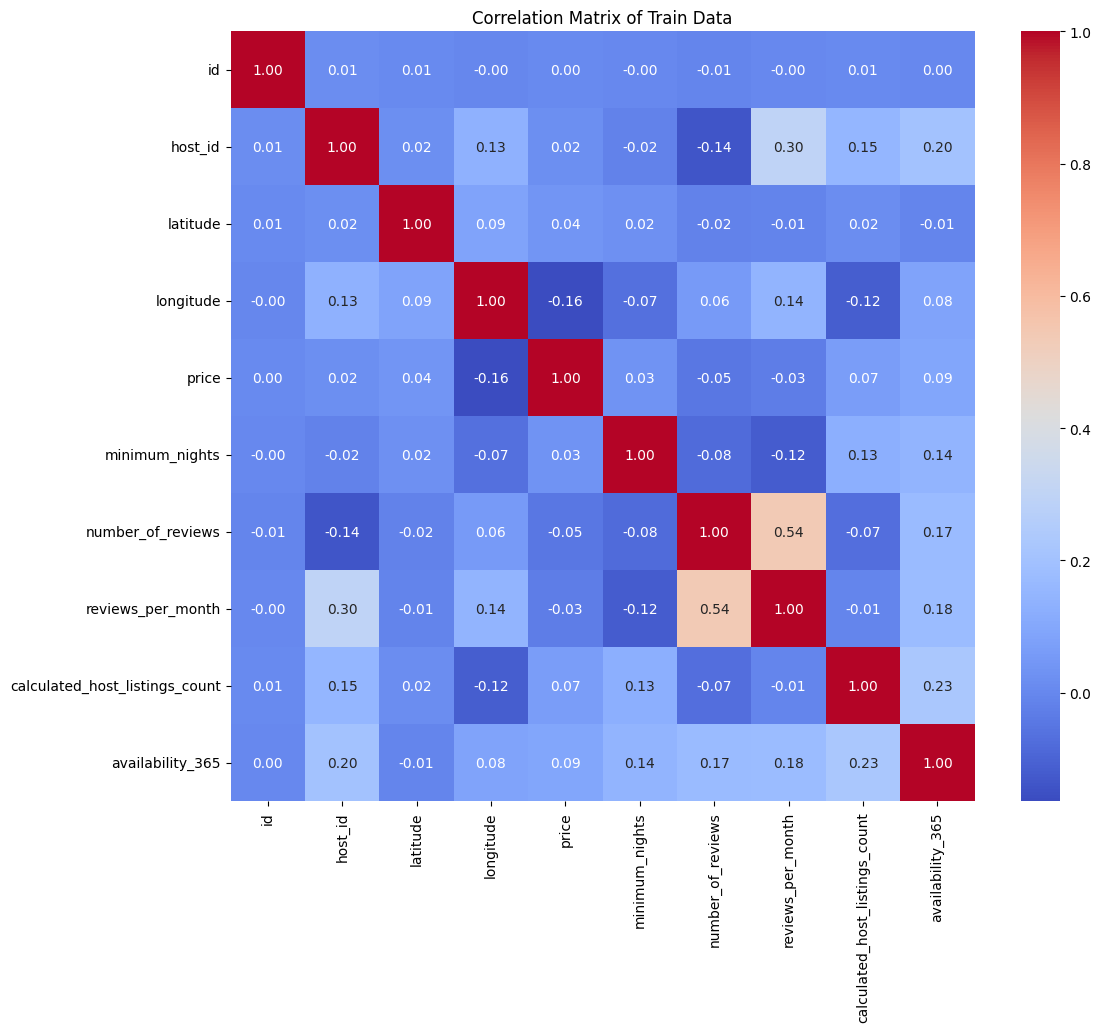

In [ ]:
import matplotlib.pyplot as plt

corr_matrix = df_train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Train Data')
plt.show()

In [ ]:
# TRANSFORM COORDINATES TO BINS
df_train["longitude"] = ((df_train["longitude"]*100)//1)/100
df_train["latitude"] = ((df_train["latitude"]*100)//1)/100
df_test["longitude"] = ((df_test["longitude"]*100)//1)/100
df_test["latitude"] = ((df_test["latitude"]*100)//1)/100

In [ ]:
# GENERATE SOME NEW FEATURES
df_train['host_density'] = df_train['calculated_host_listings_count'] / abs(df_train['longitude'])
df_test['host_density'] = df_test['calculated_host_listings_count'] / abs(df_test['longitude'])

df_train['demand_score'] = (
    (365 - df_train['availability_365']) / 365 * 0.6 +
    (df_train['reviews_per_month'] / df_train['reviews_per_month'].max()) * 0.4
)
df_test['demand_score'] = (
    (365 - df_test['availability_365']) / 365 * 0.6 +
    (df_test['reviews_per_month'] / df_test['reviews_per_month'].max()) * 0.4
)

In [ ]:
df_train.isnull().sum()

,0
id,0
name,9
host_id,0
host_name,10
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_density,demand_score
count,27379.000000,2.737900e+04,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000,21746.000000,27379.000000,27379.000000,27379.000000,21746.000000
mean,13690.000000,6.820276e+07,40.723815,-73.957108,151.569561,7.056722,23.228131,1.383797,7.228788,113.430293,0.097710,0.420604
std,7903.780846,7.910462e+07,0.054716,0.046354,219.807784,20.194945,44.281418,1.714116,33.173634,132.039807,0.448282,0.211588
min,1.000000,2.438000e+03,40.500000,-74.250000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.013468,0.000068
25%,6845.500000,7.971896e+06,40.680000,-73.990000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.013519,0.238220
50%,13690.000000,3.114212e+07,40.720000,-73.960000,105.000000,3.000000,5.000000,0.720000,1.000000,45.000000,0.013524,0.524711
75%,20534.500000,1.074344e+08,40.760000,-73.940000,175.000000,5.000000,23.000000,2.030000,2.000000,230.000000,0.027049,0.600615
max,27379.000000,2.743213e+08,40.910000,-73.720000,10000.000000,999.000000,607.000000,58.500000,327.000000,365.000000,4.420711,0.692303


In [ ]:
target = 'price'

# Drop unnecessary columns
df_train = df_train.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

# Define categorical and numerical features
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
# Code from Chatgpt
import xgboost as xgb # Import the xgboost library and alias it as 'xgb'
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.model_selection import learning_curve

# Numerical preprocessing: Fill in the missing values (median) and standardize them
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Category type preprocessing: Fill in missing values (most frequent values) and One-Hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# Merge preprocessing step
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# ============================
# Build a stack model
# ============================
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost as xgb

# Define base estimators
estimators = [
    ('xgb', xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=7,
        random_state=42,
        n_jobs=-1
    )),
    ('svr', SVR(C=1.0, epsilon=0.1))
]

# Define meta model
meta_model = Ridge(alpha=1.0)

# Create StackingRegressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Create pipeline with preprocessor and stacking model
model = Pipeline([
    ('preprocessor', preprocessor), # Assuming preprocessor is defined earlier
    ('regressor', stacking_model)
])

In [ ]:
!pip install --upgrade scikit-learn xgboost

# ============================
# Train and evaluate models & draw learning curves
# ============================
X = df_train.drop(columns=[target])
y = df_train[target]

# Divide the training set and the verification set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the model on the training set
# Set n_jobs to 1 for fitting base estimators within StackingRegressor
model.set_params(regressor__n_jobs=1) # Change to n_jobs=1
model.fit(X_train, y_train)

# Restore n_jobs to -1 (optional) if you want parallel predictions later
# model.set_params(regressor__n_jobs=-1)

# RMSE is predicted and calculated on the validation set
y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(np.mean((y_val - y_val_pred)**2))
print("Validation RMSE: {:.4f}".format(rmse_val))

Validation RMSE: 156.2250


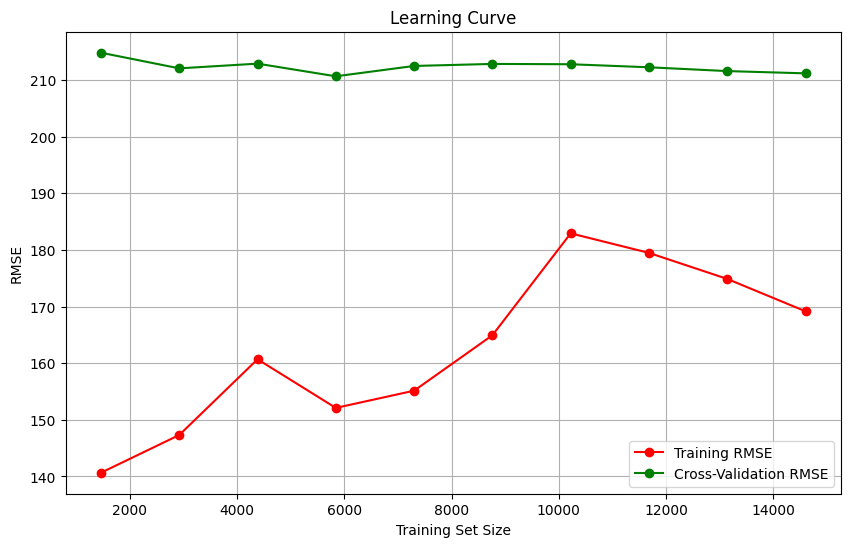

In [ ]:
# plot learning curve
train_sizes, train_scores, cv_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=3,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=None,  # Change n_jobs to None or 1 for compatibility
    error_score='raise'
)


# Convert negative MSE to RMSE
train_rmse = np.sqrt(-np.mean(train_scores, axis=1))
cv_rmse = np.sqrt(-np.mean(cv_scores, axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color='r', label='Training RMSE')
plt.plot(train_sizes, cv_rmse, 'o-', color='g', label='Cross-Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# ============================
# Final training & generating test set prediction results
# ============================
# Retrain the model with all the training data
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strat...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                               ('rf',
                                                RandomForestRegressor(max_depth=7,
                                                                      n_estimators=200,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                               ('svr', SVR())],
                                   final_estimator=Ridge(), n_jobs=1))])

In [ ]:
# FINAL STEP - MAKE PREDICTIONS

# Drop unnecessary columns in test data to match training features
df_test = df_test.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'], errors='ignore')

# Ensure test dataset has the same feature columns as the training set
missing_cols = set(X.columns) - set(df_test.columns)
if missing_cols:
    for col in missing_cols:
        df_test[col] = 0  # Add missing columns with default value

# Predict on the test dataset
predictions = model.predict(df_test)

# Create a DataFrame with id and price columns
submission_df = pd.DataFrame({
    'id': range(1, len(df_test) + 1),
    'price': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)
print("submit.csv file created successfully!")


# Alternatives to saving the CSV file
# output_txt_path = "/mnt/data/airbnb_price_predictions.txt"
# df_test[['predicted_price']].to_csv(output_txt_path, index=False, sep="\t")
# output_json_path = "/mnt/data/airbnb_price_predictions.json"
# df_test[['predicted_price']].to_json(output_json_path, orient="records", lines=True)


submit.csv file created successfully!
